<a href="https://colab.research.google.com/github/VUT-BA-3-2-Project-2025/Team-force/blob/Usher-Branch/Teamforce_one_on_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All imports here

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

Reading our dataset

In [2]:
df = pd.read_csv('Logistics')
df.head()

,item_id,category,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,storage_location_id,...,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,last_restock_date,forecasted_demand_next_7d,KPI_score
0,ITM10000,Pharma,283,21,4,4,49.85,1.56,0.43,L82,...,117.80,1.14,0,0.80,700,3.33,0.33,2024-02-17,184.37,0.556
1,ITM10001,Automotive,301,52,9,6,23.34,2.55,0.69,L15,...,178.80,1.09,3,0.79,736,10.36,0.98,2024-10-01,221.94,0.723
2,ITM10002,Groceries,132,60,11,8,37.69,3.15,0.62,L4,...,54.05,0.95,7,0.75,814,14.32,0.87,2024-04-07,53.85,0.680
3,ITM10003,Automotive,346,46,13,5,33.69,2.79,0.21,L95,...,31.10,1.90,0,0.96,994,2.08,0.29,2024-01-27,92.04,0.488
4,ITM10004,Automotive,49,55,4,6,49.58,5.23,0.31,L36,...,104.97,0.63,5,0.83,299,5.65,0.96,2024-05-17,194.58,0.670


EDA - analyzing data

In [4]:
df.describe()

,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,picking_time_seconds,handling_cost_per_unit,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,forecasted_demand_next_7d,KPI_score
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000
mean,263.491573,54.759363,8.507803,5.578340,25.435868,5.260078,0.542325,95.606429,2.777116,105.887575,1.045993,4.602372,0.849738,521.714732,8.123677,0.600581,154.286245,0.601737
std,138.568360,26.053354,3.473229,2.292486,14.038861,2.725639,0.259200,49.218084,1.305213,54.428161,0.550480,2.883708,0.086703,276.768531,4.069191,0.230511,82.945255,0.108286
min,20.000000,10.000000,3.000000,2.000000,1.010000,0.500000,0.100000,10.000000,0.500000,10.220000,0.100000,0.000000,0.700000,50.000000,1.000000,0.200000,10.090000,0.259000
25%,144.000000,32.000000,5.000000,4.000000,13.535000,2.917500,0.310000,53.000000,1.660000,59.760000,0.580000,2.000000,0.780000,283.000000,4.590000,0.400000,83.190000,0.527000
50%,264.000000,55.000000,9.000000,6.000000,25.405000,5.235000,0.540000,96.000000,2.810000,106.005000,1.050000,5.000000,0.850000,513.500000,8.150000,0.600000,152.870000,0.601000
75%,386.000000,78.000000,12.000000,8.000000,37.412500,7.542500,0.760000,138.000000,3.910000,152.410000,1.522500,7.000000,0.920000,764.250000,11.692500,0.800000,225.440000,0.677250
max,499.000000,99.000000,14.000000,9.000000,49.980000,10.000000,1.000000,179.000000,5.000000,200.000000,2.000000,9.000000,1.000000,999.000000,15.000000,1.000000,299.940000,0.936000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   object 
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   object 
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price                 3204 non-null   float

Data Cleaning

In [6]:
# Convert date column from object to datetime type
df['last_restock_date'] = pd.to_datetime(df['last_restock_date'])

In [75]:
# Feature Engineering
df['days_since_restock'] = (df['last_restock_date'].max() - df['last_restock_date']).dt.days
df['month'] = df['last_restock_date'].dt.month
df['day_of_year'] = df['last_restock_date'].dt.dayofyear
df['week_of_year'] = df['last_restock_date'].dt.isocalendar().week.astype(int)

In [60]:
#just a safe check, count missing numeric values in each field
missing_numeric_count = df.select_dtypes(include=['float64', 'int64']).isna().sum()
print(missing_numeric_count)

#swwet, no missing values in numeric data

stock_level                  0
reorder_point                0
reorder_frequency_days       0
lead_time_days               0
daily_demand                 0
demand_std_dev               0
item_popularity_score        0
picking_time_seconds         0
handling_cost_per_unit       0
unit_price                   0
holding_cost_per_unit_day    0
stockout_count_last_month    0
order_fulfillment_rate       0
total_orders_last_month      0
turnover_ratio               0
layout_efficiency_score      0
forecasted_demand_next_7d    0
KPI_score                    0
inventory_value              0
days_since_restock           0
demand_variability           0
reorder_point_ratio          0
is_at_risk_of_stockout       0
dtype: int64


In [9]:
#count missing object (string) fileds
missing_object_count = df.select_dtypes(include=['object']).isna().sum()
print(missing_object_count)

#confirmed, no missing data in any column

item_id                0
category               0
storage_location_id    0
zone                   0
dtype: int64


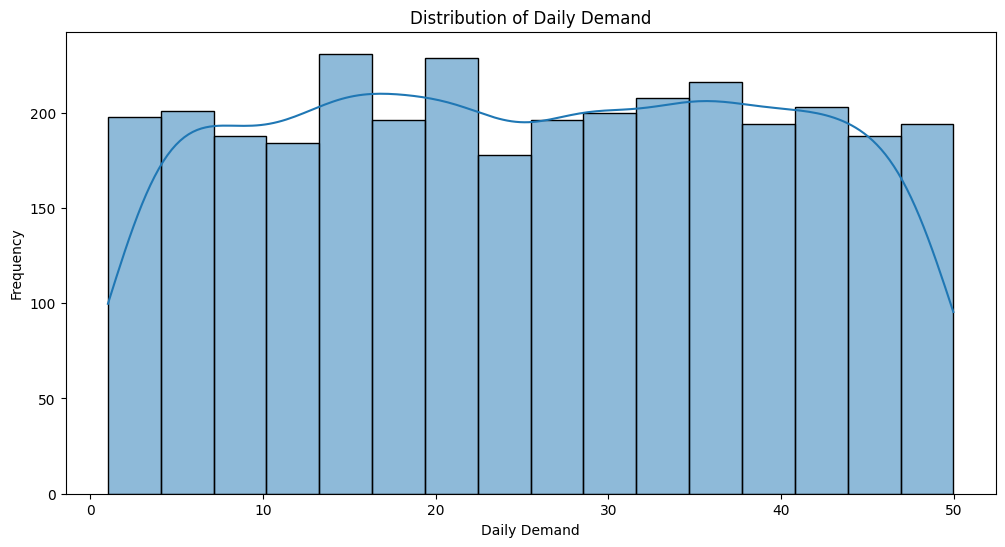

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(df['daily_demand'], kde=True)
plt.title('Distribution of Daily Demand')
plt.xlabel('Daily Demand')
plt.ylabel('Frequency')
plt.show()

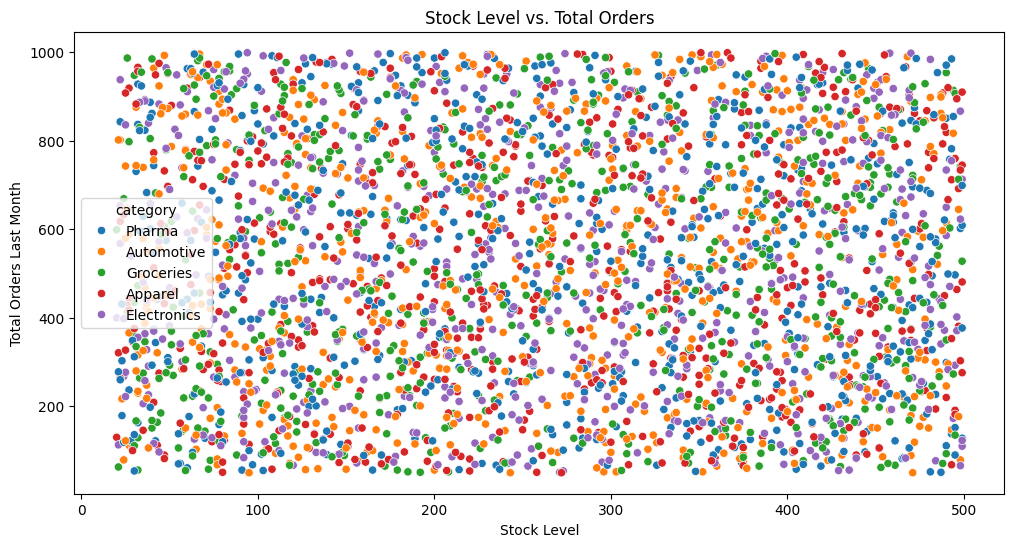

In [62]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='stock_level', y='total_orders_last_month', hue='category', data=df)
plt.title('Stock Level vs. Total Orders')
plt.xlabel('Stock Level')
plt.ylabel('Total Orders Last Month')
plt.show()

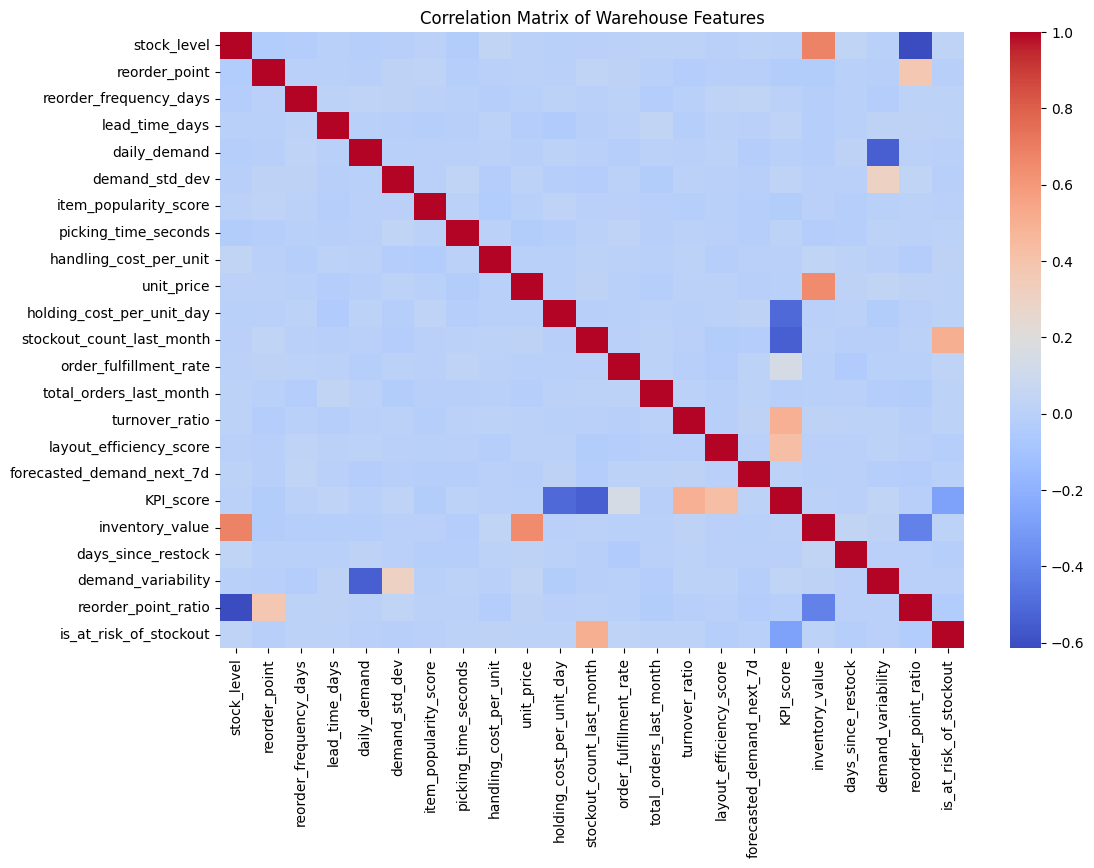

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Warehouse Features')
plt.show()

Train our model based on forecasted demand

In [76]:
features = ['stock_level', 'reorder_point', 'lead_time_days', 'daily_demand',
        'demand_std_dev', 'item_popularity_score', 'total_orders_last_month',
        'turnover_ratio', 'days_since_restock',
        # Added features for better accuracy
        'month', 'day_of_year', 'week_of_year']
target = 'forecasted_demand_next_7d'

In [77]:
X = df[features]
y = df[target]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=12)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=12)

In [84]:
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Demand Forecasting Model (Gradient Boosting Regressor) RMSE: {rmse:.2f}")

Demand Forecasting Model (Gradient Boosting Regressor) RMSE: 88.95


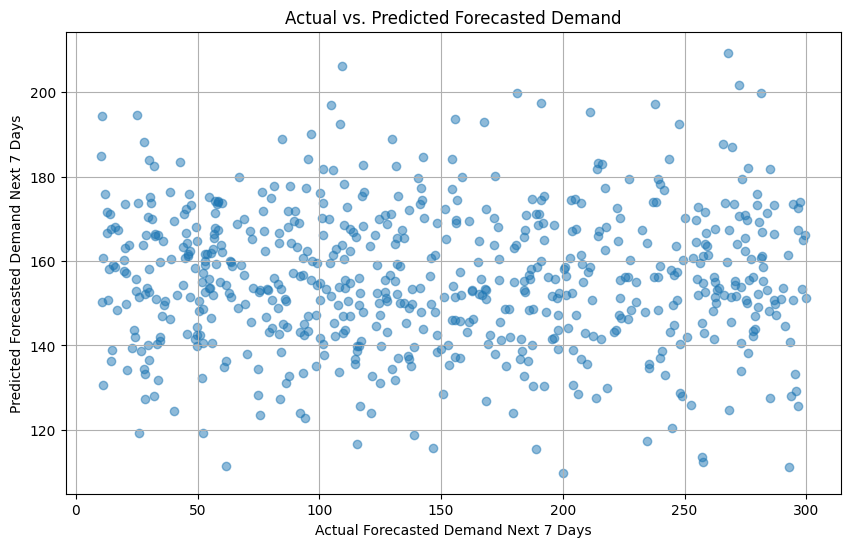

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Forecasted Demand Next 7 Days")
plt.ylabel("Predicted Forecasted Demand Next 7 Days")
plt.title("Actual vs. Predicted Forecasted Demand")
plt.grid(True)
plt.show()

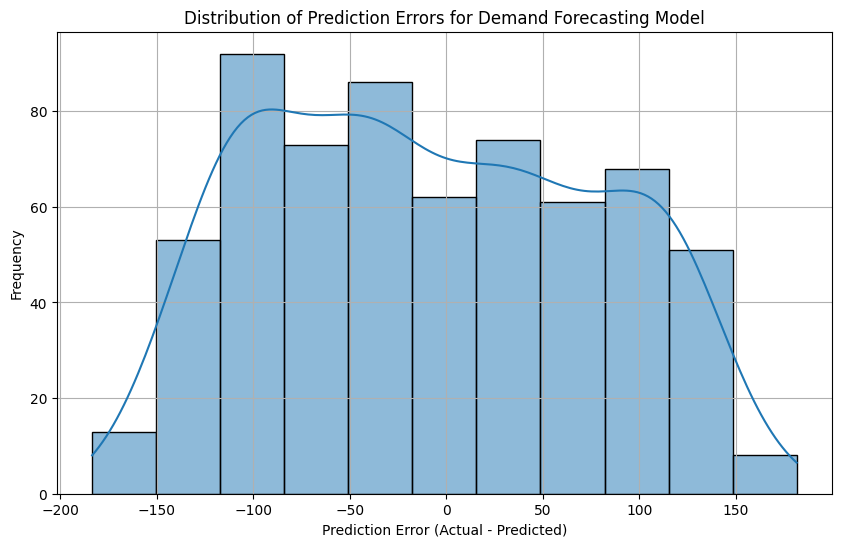

In [72]:
# Calculate the prediction errors (residuals)
errors = y_test - predictions

# Plot a histogram of the errors
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors for Demand Forecasting Model")
plt.grid(True)
plt.show()

Stockout Prediction Model

In [21]:
x_features = ['stock_level', 'reorder_point', 'daily_demand', 'lead_time_days',
        'demand_std_dev', 'turnover_ratio', 'days_since_restock']
y_target = 'is_at_risk_of_stockout'

In [32]:
df['is_at_risk_of_stockout'] = (df['stockout_count_last_month'] > 0).astype(int)

In [35]:
X = df[x_features]
y = df[y_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
y_target = 'is_at_risk_of_stockout'
X = df[x_features]
y = df[y_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [37]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Stockout Prediction Model (Gradient Boosting) Accuracy: {accuracy:.2%}")

Stockout Prediction Model (Gradient Boosting) Accuracy: 92.04%


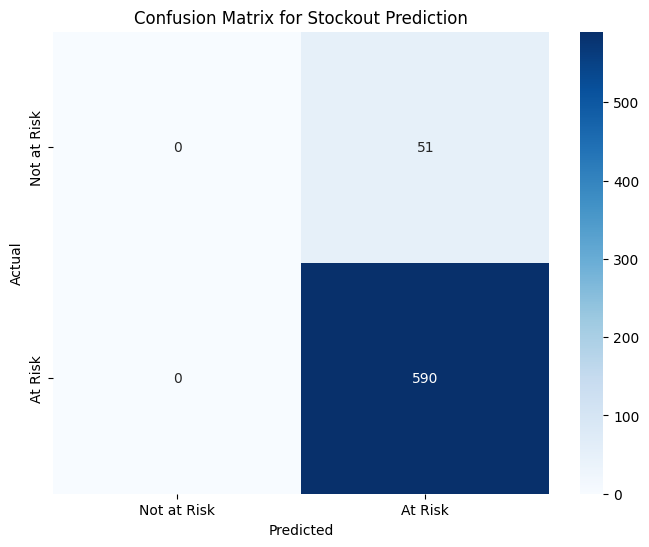

In [50]:
from sklearn.metrics import confusion_matrix

# Generate predictions on the test set
predictions = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not at Risk', 'At Risk'], yticklabels=['Not at Risk', 'At Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stockout Prediction')
plt.show()

In [86]:
def get_item_coordinates(item_ids, df):
    """
    Generates simulated (x, y) coordinates for a list of items based on their zone and location ID.
    """
    coordinates = {}
    item_locations = df[df['item_id'].isin(item_ids)][['item_id', 'zone', 'storage_location_id']]

    for _, item in item_locations.iterrows():
        zone_offset = (ord(item['zone']) - ord('A')) * 100 # Zones are 100 units apart
        # Location ID contributes to both x and y to spread items out
        loc_id_val = int(item['storage_location_id'].replace('L', ''))
        x = zone_offset + (loc_id_val % 10) * 10
        y = (loc_id_val // 10) * 10
        coordinates[item['item_id']] = (x, y)
    return coordinates

In [87]:
def get_optimized_picking_route_tsp(item_ids, df):
    """
    Generates an optimized picking route using the Nearest Neighbor algorithm for the
    Traveling Salesperson Problem (TSP).
    """
    if df is None or not item_ids:
        return []

    item_coords = get_item_coordinates(item_ids, df)
    if not item_coords:
        print("Warning: None of the requested items were found or have coordinates.")
        return []

    # Add a starting depot
    locations = {'DEPOT': (0, 0), **item_coords}
    unvisited = list(item_coords.keys())
    current_location = 'DEPOT'
    route_ids = ['DEPOT']

    while unvisited:
        # Find the nearest unvisited location
        nearest_loc = min(unvisited, key=lambda loc: distance.euclidean(locations[current_location], locations[loc]))

        # Move to the nearest location
        current_location = nearest_loc
        route_ids.append(current_location)
        unvisited.remove(current_location)

    # Add the return to the depot to complete the tour
    route_ids.append('DEPOT')

    print("\n--- Optimized Picking Route (TSP using Nearest Neighbor) ---")
    route_steps = []
    item_info = df.set_index('item_id')
    for i in range(len(route_ids) - 1):
        item_id = route_ids[i]
        if item_id == 'DEPOT':
            route_steps.append("Start at Depot")
        else:
            info = item_info.loc[item_id]
            route_steps.append(f"Pick item {item_id} from Zone {info['zone']}, Location {info['storage_location_id']}")
    route_steps.append("Return to Depot")

    return route_steps